In [1]:
import glob
import xlsxwriter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
import matplotlib
import pandas as pd
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

from netCDF4 import Dataset
#Import os, os environ untuk mengatasi error pada basemap, kalau basemapnya ngga error hapus aja
#Sesuaikan letak file epsg di komputer
import os 
os.environ["PROJ_LIB"] = "C:\\Users\\Lenovo\\anaconda3\\pkgs\\proj4-5.2.0-h6538335_1006\\Library\\share"; #fixr
from mpl_toolkits.basemap import cm
from mpl_toolkits.basemap import Basemap

In [2]:
# baca semua lokasi data TRMM

path = glob.glob('JADI/*.nc4', recursive=True)

pathfiles = []
for filename in path:
    pathfiles.append(filename)
pathfiles = np.array(pathfiles)
print(pathfiles)

['JADI\\3B42_Daily.20120101.7.nc4.nc4'
 'JADI\\3B42_Daily.20120102.7.nc4.nc4'
 'JADI\\3B42_Daily.20120103.7.nc4.nc4' ...
 'JADI\\3B42_Daily.20141229.7.nc4.nc4'
 'JADI\\3B42_Daily.20141230.7.nc4.nc4'
 'JADI\\3B42_Daily.20141231.7.nc4.nc4']


In [3]:
# baca semua data TRMM dan ambil variabel hujan

nt = pathfiles.size
pr = np.empty(shape=(nt,81,181))

for i in range(nt):
    data = Dataset(pathfiles[i])
    pr[i,:,:] = data['precipitation'][:].T

In [4]:
#pr.shape
print(pr)

[[[ 9.44999981  8.43000031  5.21999979 ...  0.          1.74000001
    2.30999994]
  [ 9.05999947  8.30999947  5.36999989 ...  0.06        1.74000001
    3.53999996]
  [12.95999908  7.04999971  0.14999999 ...  1.16999996  1.83000004
    3.57000017]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.26999998 ...  0.          0.
    0.        ]]

 [[ 5.54999971  8.00999928  6.21000004 ...  0.          0.
    0.        ]
  [ 6.05999994  2.00999975  6.84000015 ...  0.          0.
    0.        ]
  [30.41999817  5.25        5.93999958 ...  0.          0.
    0.06      ]
  ...
  [ 0.06        0.77999997  0.77999997 ...  0.          0.
    0.        ]
  [ 0.21000001  1.16999996  3.86999989 ...  0.50999999  0.
    0.        ]
  [ 2.03999996  1.16999996  1.68000007 ...  0.38999999  0.
    0.        ]]

 [[ 6.14999962  6.2699995   7.2300005  ...  0.          0.
 

In [5]:
lat = data['lat'][:]
lon = data['lon'][:]
lons, lats = np.meshgrid(lon,lat)

In [6]:
nt

1096

In [7]:
# akumulasi data harian menjadi bulanan

pr_das = np.empty(shape=(int(nt/30),81,181))
j = 0

for i in range(int(nt/30)):
    das = sum(pr[j:j+30,:,:])
    pr_das[i,:,:] = das
    j=j+30

In [8]:
print(pr_das)
#pr_das.shape
#data = Dataset('TRMM baru\\3B42_Daily.20120101.7.nc4.nc4', mode='r')
#data.variables

[[[2.81279998e+02 2.77379992e+02 2.87249986e+02 ... 4.23689995e+02
   4.66439987e+02 3.20849998e+02]
  [2.60549989e+02 2.54549992e+02 2.56229992e+02 ... 3.82109980e+02
   3.43319993e+02 2.52599996e+02]
  [2.77859991e+02 2.48009997e+02 2.56289995e+02 ... 3.18539998e+02
   3.01139993e+02 3.07829987e+02]
  ...
  [1.73400000e+02 2.06039988e+02 2.22779995e+02 ... 4.19399985e+01
   4.32299986e+01 8.14499960e+01]
  [1.74809988e+02 2.34090002e+02 2.63369979e+02 ... 4.62899991e+01
   3.77999998e+01 4.37699985e+01]
  [1.14929994e+02 1.34549988e+02 1.80480000e+02 ... 7.88399969e+01
   5.14799984e+01 3.73499981e+01]]

 [[1.57139997e+02 1.71419999e+02 1.95719994e+02 ... 3.63359994e+02
   3.71459984e+02 2.34510000e+02]
  [1.38689995e+02 1.42290000e+02 1.64009995e+02 ... 4.35419995e+02
   4.01579998e+02 2.53199999e+02]
  [1.06259999e+02 1.12350000e+02 1.31879993e+02 ... 4.10399992e+02
   4.36589984e+02 3.14039991e+02]
  ...
  [9.12599968e+01 1.24019999e+02 1.28219995e+02 ... 1.34249995e+02
   1.60529

In [9]:
meanklim=np.empty([12,81,181])
for i in range(12):
    for j in range(81):
        for k in range(181):
            meanklim[i,j,k]=np.mean(pr_das[i:1096:12,j,k])

In [10]:
#meanklim.shape
print(meanklim)

[[[161.54999462 166.00999805 166.30999399 ... 293.12999443 295.66999267
   254.13999466]
  [164.11999392 162.909994   157.34999409 ... 296.89999089 272.27999249
   264.5399938 ]
  [165.21999459 158.2399956  163.99999528 ... 278.59999685 289.20999003
   313.45998993]
  ...
  [ 81.4900003   88.97999533  90.46999829 ... 100.05999563  90.50999915
    96.37999627]
  [ 79.47999627  97.47000056 111.93999307 ...  93.60999966  86.29999963
    84.3399964 ]
  [ 73.50999625  66.15999605  76.14999983 ...  83.82999755  71.75999949
    73.54999664]]

 [[115.18999615 130.64999819 150.52999849 ... 381.81999003 358.4099934
   319.28999469]
  [118.30999828 128.99000073 155.14999724 ... 394.53999679 376.80999917
   324.23999873]
  [143.88999831 130.35999766 133.30999786 ... 380.81999304 393.33998818
   349.1599927 ]
  ...
  [ 53.8399995   62.27999916  54.28999864 ... 159.31999659 178.83999109
   181.22999867]
  [ 61.48000061  54.81999822  67.02999635 ... 150.47000158 171.32999973
   169.99999632]
  [ 51.0

In [21]:
meanklim['B01'][4000:8000:2, 4000:8000:2]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [17]:
# # potong data sesuai domain Jawa Barat

# lat1 = lat[211:225] # -7.125 -3.875
# lon1 = lon[1135:1153] # 103.875 108.125
# lons, lats = np.meshgrid(lon1,lat1)

# pr_jabar = pr[:, 211:225, 1135:1153]
# print(pr_jabar.shape)

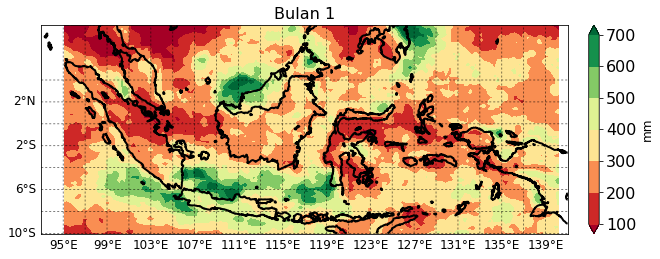

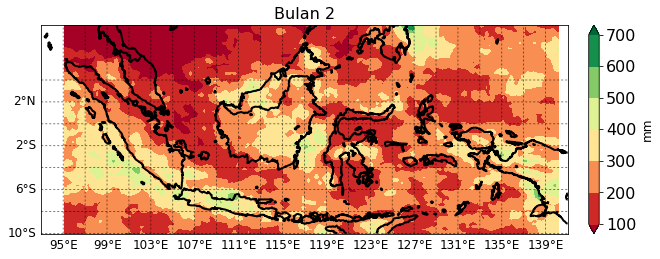

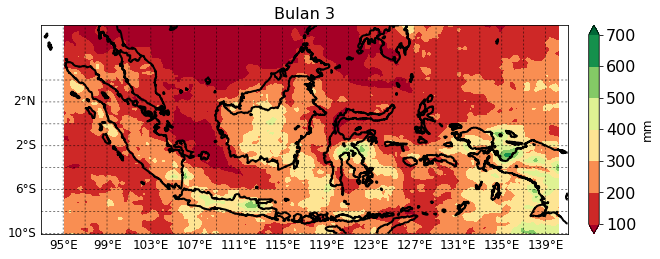

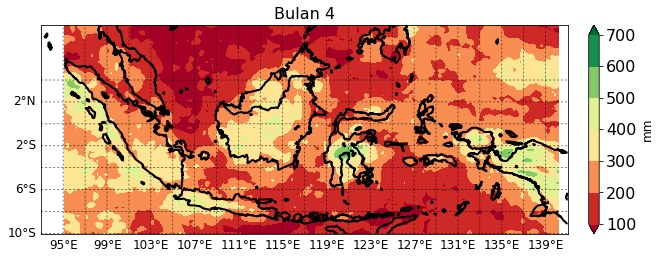

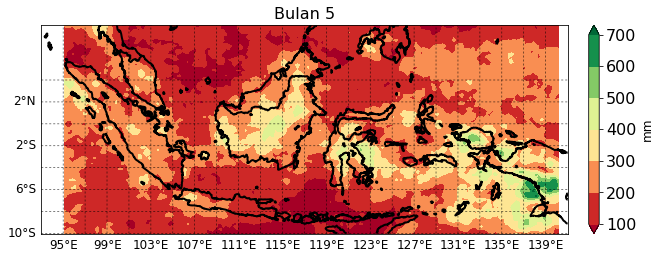

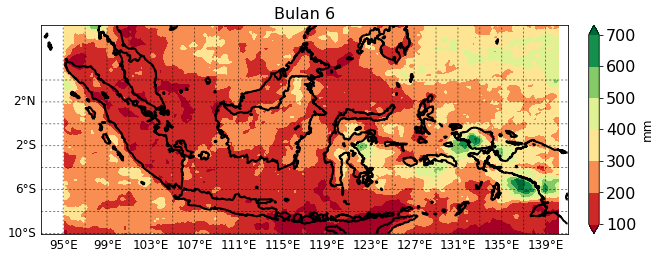

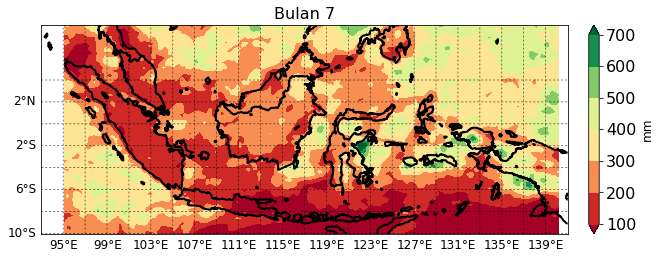

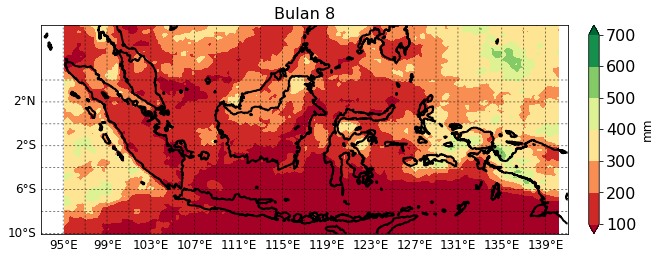

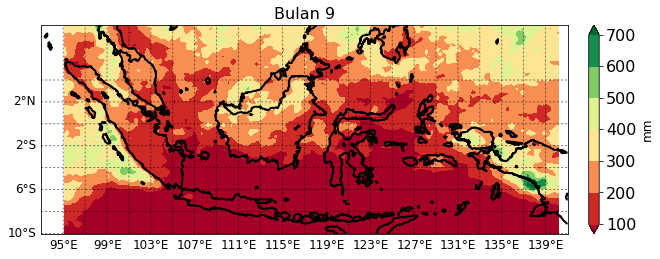

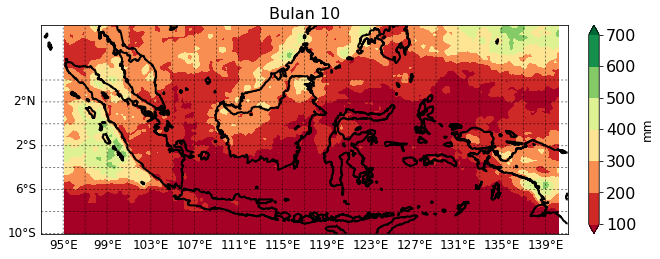

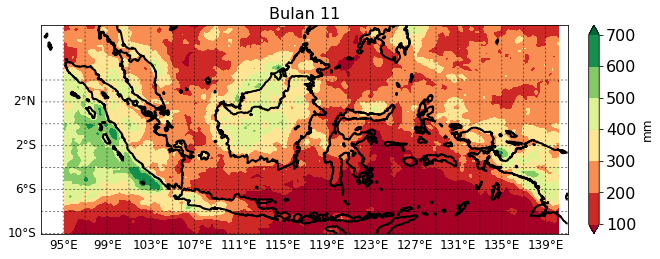

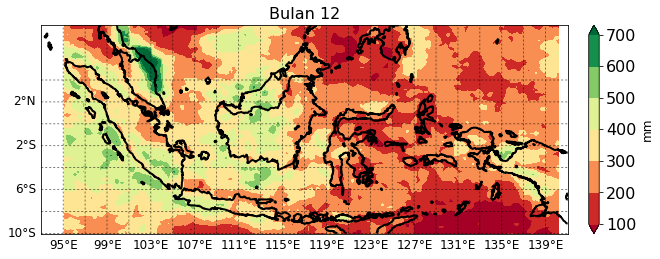

In [29]:
for i in range(12):
    fig = plt.figure(figsize=(10,10))
    #levels = np.arange(50,270,10)

    bm = Basemap(projection='cyl', llcrnrlon=93, llcrnrlat=-10,
                 urcrnrlon=141, urcrnrlat=9, resolution='i') 

    # Add geographic outlines
    bm.drawcoastlines(color='black', linewidth=2, zorder=2)
    bm.drawstates(linewidth=2)
    bm.drawcountries(linewidth=2)

    # Draw parallels and meridians
    bm.drawparallels(np.arange(-10, 6, 2), labels=[0, 0, 0, 0], linewidth=0.5, dashes=[4, 4], fontsize=12) # lat grid
    bm.drawmeridians(np.arange(95, 141, 2), labels=[0, 0, 0, 0], linewidth=0.5, dashes=[4, 4], fontsize=12) # lon grid
    bm.drawparallels(np.arange(-10, 6, 4), labels=[1, 0, 0, 0], linewidth=0, dashes=[4, 4], fontsize=12) # lat text
    bm.drawmeridians(np.arange(95, 141, 4), labels=[0, 0, 0, 1], linewidth=0, dashes=[4, 4], fontsize=12) # lon text
    
    contourf = bm.colorbar(bm.contourf(lons, lats, meanklim[i,:,:], levels=[100, 200,300,400,500,600,700], cmap='RdYlGn', extend='both', zorder=1),
                           location='right', size='2%', pad='4%')
    #contourf = bm.contourf(lons, lats, pr_das[i,:,:],levels=levels, cmap='Blues', extend='both'zorder=1),
                           #location='right', size='2%', pad='4%')
    contourf.set_label('mm', fontsize=12)
    contourf.ax.tick_params(labelsize=16)

    # Add title
    plt.title("Bulan "+str(i+1), fontsize=16)

    # Save image
    #fig.savefig("Bulan "+str(i+1)+".png", bbox='tight', dpi=100)

In [30]:
# ekstrak data timeseries ke excel

workbook = xlsxwriter.Workbook('Rata-rata bulanan 2012-2014.xlsx') 

for y in range(len(lat)):
    worksheet = workbook.add_worksheet(str(lat[y]))

    row = 0
    column = 0
    worksheet.write(row, column, "Bulanan")

    row = 0
    column = 1
    for item in lon[:]:
        worksheet.write(row, column, item)
        column += 1
    
    row = 1
    column = 0
    for item in (np.arange(0,int(nt/10),1)):
        worksheet.write(row, column, item+1)
        row += 1

    for x in range(len(lon)):
        row = 1
        column = x+1
        for item in pr_das[:,y,x]:
            worksheet.write(row, column, item)
            row += 1

workbook.close()